In [1]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'..')
from src.data.etl import *
from src.model.train_model import *
from src.analysis.analysis import *

In [2]:
print(sys.path)

['..', '/home/caw062/template/notebooks', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/home/caw062/.local/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/caw062/.ipython']


# Epidemiology Model 


# Data 
- 1. COVID-19 US cases: Directly read data from JHU github repo.
- 2. Mobility Data provided by Apple for each county in the U.S.


In [3]:
us_confirmed_df,us_death_df,global_recover_df,mobility = retrieve_data()
display(us_confirmed_df.head())
display(us_death_df.head())
display(global_recover_df.head())
display(mobility.head())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21
0,84001001,US,USA,840,01001,Autauga,Alabama,US,32.539527,-86.644082,...,6203,6228,6248,6264,6270,6303,6313,6324,6333,6344
1,84001003,US,USA,840,01003,Baldwin,Alabama,US,30.727750,-87.722071,...,19670,19698,19714,19732,19758,19790,19856,19873,19890,19915
2,84001005,US,USA,840,01005,Barbour,Alabama,US,31.868263,-85.387129,...,2099,2106,2113,2115,2116,2124,2129,2136,2139,2138
3,84001007,US,USA,840,01007,Bibb,Alabama,US,32.996421,-87.125115,...,2442,2445,2449,2450,2450,2454,2459,2461,2457,2460
4,84001009,US,USA,840,01009,Blount,Alabama,US,33.982109,-86.567906,...,6086,6084,6095,6097,6102,6106,6229,6236,6246,6252


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21
0,84001001,US,USA,840,01001,Autauga,Alabama,US,32.539527,-86.644082,...,89,90,91,91,91,91,91,92,92,92
1,84001003,US,USA,840,01003,Baldwin,Alabama,US,30.727750,-87.722071,...,274,277,283,283,283,284,285,289,289,289
2,84001005,US,USA,840,01005,Barbour,Alabama,US,31.868263,-85.387129,...,51,51,51,51,51,51,51,51,51,51
3,84001007,US,USA,840,01007,Bibb,Alabama,US,32.996421,-87.125115,...,60,60,60,60,60,60,60,60,58,58
4,84001009,US,USA,840,01009,Blount,Alabama,US,33.982109,-86.567906,...,125,125,127,127,127,127,127,127,128,128


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49281,49285,49288,49333,49344,49347,49359,49362,49362,49369
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,67158,68007,68969,69773,70413,71173,72076,72853,73610,74352
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,77683,77842,77976,78098,78234,78377,78524,78672,78824,78946
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10356,10394,10429,10446,10475,10501,10560,10564,10584,10599
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19238,19307,19315,19322,19400,19410,19509,19553,19624,19640


,Country_code,Admin_level,Admin1,Admin2,FIPS,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,...,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21
0,US,1,Alabama,NaN,00001,0.011796,0.018045,0.195074,0.016354,0.181694,...,0.017221,0.016790,0.021361,0.016755,0.012905,0.016519,0.018261,0.015960,0.021598,0.021322
1,US,2,Alabama,Autauga County,01001,0.010175,0.025468,0.258896,0.022481,0.243549,...,0.021851,0.021084,0.027120,0.015800,0.011539,0.020856,0.021891,0.020568,0.026956,0.027310
2,US,2,Alabama,Baldwin County,01003,0.013860,0.020959,0.213163,0.017559,0.205228,...,0.017355,0.016828,0.021232,0.016327,0.015455,0.017090,0.018070,0.016498,0.022140,0.022194
3,US,2,Alabama,Barbour County,01005,0.011820,0.017347,0.170692,0.010406,0.135686,...,0.015278,0.019309,0.023326,0.018943,0.014178,0.018792,0.018803,0.017192,0.025782,0.022562
4,US,2,Alabama,Bibb County,01007,0.018460,0.040510,0.456464,0.037057,0.450207,...,0.028524,0.032317,0.040851,0.030784,0.020024,0.027738,0.031105,0.028870,0.036492,0.040859


In [4]:
df_list = us_confirmed_df,us_death_df,global_recover_df,mobility

# Key variables of Epidemiology Model
- I, the number of infected, is in the `us_comfirmed`
- S, susceptible to COVID-19, is in `us_population` - `us_confirmed`, denoted as `us_susceptible`
- R, removed, is the sum of recovered and deceased. 
- N, population

## Parameters
- Beta: the infection rate
- D: number of days a patient can stay infected

## Goal
- With existing knowledge of I,S,R,and N, use gradient descent to figure out $\theta$ = ($\beta$, D)

# Methods
## Gradient Descent to solve for $\beta$ and $\frac{1}{D}$

Given: 
$\begin{align*}
  &\xi = \frac{1}{D} \\
  &f_s(I_n,N,S_n) = -\beta\left(\frac{I_n}{N}\right) S_n, \\
  &f_I(I_n,N,S_n) = - I\xi + \beta\left(\frac{I_n}{N}\right) S_n,  \\
  &f_R(I_n) = I_n\xi, \\
  &h=1
\end{align*}
$

Plug the above values into
$\frac{1}{N} \sum_{n=1}^N \nabla_{\theta} \left( \left({\frac{s(n+1)-s(n)}{h} - f_s(s(n), I(n), R(n);\theta)}\right)^2
+ \left({\frac{I(n+1)-I(n)}{h} - f_I(s(n), I(n), R(n;\theta)}\right)^2 + \dots \right)$

To calculate the above the term, we need to use __chain rule__ to differentiate with respect to $\beta$ and $\xi$

$\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$



## Tuning
First initialize $\theta$ at $\beta = 0.2 $ and $\xi = 0.1$


Then, at each iteration update $\beta$ and $\xi$ according to the rules below


$\beta_{k+1} = \beta_k - h_G \partial_\beta L(\theta|s(1),\dots,s(N)),$


$
\xi_{k+1} = \xi_k - h_G \partial_\xi L(\theta|s(1),\dots,s(N)).$
 where $h_G = 0.001$
 


 ## Tuning learning rate
 $\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta_{k} S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$


 The Hessian matrix will look like the following:
$ \begin{bmatrix}
 \frac{\partial \nabla_{\beta}}{\partial \beta} &  \frac{\partial \nabla_{\xi}}{\partial_{\beta}}\\
\frac{\partial \nabla_{\beta}}{\partial_{\xi}} & \frac{\partial \nabla_{\xi}}{\partial \xi}
\end{bmatrix}$

We can calculate the hessian matrix given s,i arrays and population 

 $
 \begin{aligned}
 \frac{\partial \nabla_{\beta}}{\partial \beta} &= \frac{1}{N} \sum_{n=1}^N \left(2\cdot \left(S_{n}\cdot \frac{I_{n}}{N}\right)^2 + 2\cdot \left(S_{n} \cdot \frac{I_{n}}{N}\right) ^2\right) \\
 &= \frac{1}{N} \sum_{n=1}^N \left(4\cdot \left(S_{n}\cdot \frac{I_{n}}{N}\right)^2\right) 
  \end{aligned}$
 
  $\begin{aligned}
  \frac{\partial \nabla_{\xi}}{\partial \xi} &= \frac{1}{N} \sum_{n=1}^N \left(2\cdot I_{n} ^2 + 2\cdot I_{n} ^2\right) \\
  &= \frac{1}{N} \sum_{n=1}^N  4\cdot I_{n} ^2
  \end{aligned}$
  
   $
 \begin{aligned}
 \frac{\partial \nabla_{\xi}}{\partial_{\beta}} &=  \frac{1}{N} \sum_{n=1}^N -2 \cdot S_{n}\cdot \frac{I_{n}^2}{N} \\
 & = \frac{\partial \nabla_{\beta}}{\partial_{\xi}}
  \end{aligned}$
  
  

  
We then use numpy.lin.eg to get the eigen value of the hessian matrix

0.17522709901040817 399.86971899067424


'california.png'

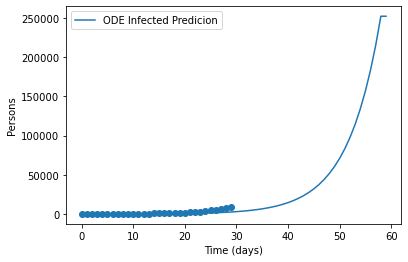

In [5]:
s,i,r,p = get_state(40,30,df_list,"California")
learning_rate = tune_learning_rate(s,i,r,p)
beta,d = calculate(s,i,r,p,learning_rate,p)
print(beta,d)
length = 60 #predicting 20 more days 
draw_ODE_from_data("california.png",s,i,r,p,beta,d,length,int_steps=1)

Infection Rate (beta) is:    0.0045431843251672295
Infection duration (D) is:    12548.92719232403


'sd.png'

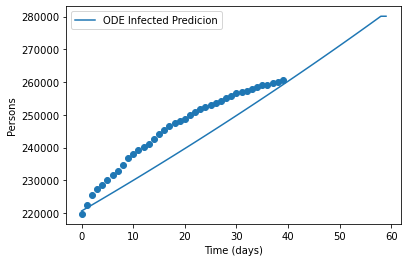

In [6]:
s,i,r,p = get_county(365,40,df_list,"06073")
learning_rate = tune_learning_rate(s,i,r,p)
beta,d = calculate(s,i,r,p,learning_rate,p)
print("Infection Rate (beta) is:    "+str(beta))
print("Infection duration (D) is:    "+str(d))
length = 60 #predicting 20 more days 
draw_ODE_from_data("sd.png",s,i,r,p,beta,d,length,int_steps=1)

# Use Geographical Information And Mobility Data to Predict County Infection
Each county is never in total isolation from other counties. There is always traffic going in and out of the counties at county borders. So it is necessary to account for the relative mobility, what are the neighboring counties and what are the infection numbers of the neighboring counties to predict infection numbers for each county.

We will use spatial dynamics to predict case numbers for the next day based on the case numbers of the previous day (and of course, geographical information and mobility score)

$\begin{align*}
  \frac{\partial S(x,t)}{\partial t} &= -\beta\left(\frac{I(x,t)}{N}\right) S(x,t) + M(x,t) \Delta_x S(x,t), \\
  \frac{\partial I(x,t)}{\partial t} &= - \frac{I(x,t)}{D} + \beta\left(\frac{I(x,t)}{N}\right) S(x,t) + M(x,t) \Delta_x I(x,t),  \\
  \frac{\partial R(x,t)}{\partial t} &= \frac{I(x,t)}{D} + M(x,t) \Delta_x R(x,t).
\end{align*}$

The complete dynamics looks like:
$\begin{multline*}
I(x_1,y_2,t_1) = I(x_1,y_2,t_2) 
- \frac{I(x_1,y_2,t_2)}{D} + \beta\left(\frac{I(x_1,y_2,t_2)}{N}\right) S(x_1,y_2,t_2)  \\
+ M * { I(x_0,y_2,t_2) + I(x_2,y_2,t_2) - 2 I(x_1,y_2,t_2)  + I(x_1,y_1,t_2) + I(x_1,y_3,t_2) - 2 I(x_1,y_2,t_2) }.
\end{multline*}
$
Where M stands for Mobility index (ranging from 0 to 1, and 1 means the most active), I stands for Infection, S stands for Suspected, t_2 stands for the previous day, and t_1 stands for the day we want to predict
$\begin{align}
\frac{\partial I(x,t)}{\partial t} &= - \frac{I(x,t)}{D} + \beta\left(\frac{I(x,t)}{N}\right) S(x,t) + M(x,t) \Delta_x I(x,t)\end{align}$


The gradient would be calculated as $
\nabla_x I(x,t) |_{(x^1, x^2)} \approx
\left( \begin{array}{c}
    \frac{I(x^1,t) - I(x^2,t)}{x^1_1 - x^2_1} 
    \frac{I(x^1,t) - I(x^2,t)}{x^1_2 - x^2_2}
\end{array}
\right)
$

for two neighboring points: $x^1$, $x^2$.
\begin{align}
\Delta_x I(x,t) |_{(x^1, x^2, x^3)} \approx
    \frac{ \partial_{x_1} I(x,t) |_{(x^1, x^2)} - \partial_{x_1} I(x,t) |_{(x^2, x^3)} }{ x^1_1 - x^3_1 } 
    + \frac{ \partial_{x_2} I(x,t) |_{(x^1, x^2)} - \partial_{x_2} I(x,t) |_{(x^2, x^3)} }{ x^1_2 - x^3_2 } \\
    + \frac{ \partial_{x_1} I(x,t) |_{(x^4, x^2)} - \partial_{x_1} I(x,t) |_{(x^2, x^5)} }{ x^4_1 - x^5_1 } 
    + \frac{ \partial_{x_2} I(x,t) |_{(x^4, x^2)} - \partial_{x_2} I(x,t) |_{(x^2, x^5)} }{ x^4_2 - x^5_2 } 
\end{align}
If $x$ is a uniform mesh, then at $x_{(2,2)}$,
\begin{align}
\Delta_x I &= \frac{ (I(x_{(1,2)} ,t ) - I( x_{(2,2)} ,t ) - ( I(x_{2,2},t) - I(x_{(3,2)},t) ) }{\Delta x^2} + \frac{I(x_{(2,1)},t) + I(x_{(2,3)},t) - 2 I(x_{2,2},t) }{\Delta x^2} \\
&= \frac{I(x_{west},t) + I(x_{east},t) - 2 I(x_{center},t) }{\Delta x^2} + \frac{I(x_{south},t) + I(x_{north},t) - 2 I(x_{center},t) }{\Delta x^2}.
\end{align}


$ \Delta x$ can be calulcated as $x_{west,lat} - x_{east,lat}$

# Example: Southern California
We performed a prediction test for southern california. Most counties have error rate less than 25%. 

In [22]:
url = 'https://raw.githubusercontent.com/wendyw1999/nearbyjson_file/main/nearby.json'

def read_github_json_file(url):
    import requests
    resp = requests.get(url)
    nearby_data = json.loads(resp.text)
    return nearby_data

{'01001': {'north': '01021',
  'south': 'border',
  'west': '01051',
  'east': '01047'},
 '01003': {'north': '01025',
  'south': 'border',
  'west': '01053',
  'east': '01097'},
 '01005': {'north': '01045',
  'south': 'border',
  'west': '13061',
  'east': '01011'},
 '01007': {'north': '01073',
  'south': 'border',
  'west': '01021',
  'east': '01065'},
 '01009': {'north': '01073',
  'south': 'border',
  'west': '01055',
  'east': '01043'},
 '01011': {'north': '01087',
  'south': 'border',
  'west': '01005',
  'east': '01101'},
 '01013': {'north': '01035',
  'south': 'border',
  'west': '01041',
  'east': '01099'},
 '01015': {'north': '01019',
  'south': 'border',
  'west': '01029',
  'east': '01115'},
 '01017': {'north': '01081',
  'south': 'border',
  'west': '13145',
  'east': '01123'},
 '01019': {'north': '01015',
  'south': 'border',
  'west': '13115',
  'east': '01055'},
 '01021': {'north': '01001',
  'south': 'border',
  'west': '01037',
  'east': '01007'},
 '01023': {'north': '

In [17]:

s,i,r,p = get_county(365,40,df_list,"06073")
learning_rate = tune_learning_rate(s,i,r,p)
beta,d = calculate(s,i,r,p,learning_rate,p)


In [15]:
def california_prediction(nearby_file,date1,date2,beta,d,us_confirmd_df,us_death_df,mobility_df,n=5):
    '''
    nearby_file:the file location of nearby file
    date1: the previous day
    date2: the second day (prediction day)
    beta: infection rate
    d: infection duration
    n: default at 5, the dt
    '''
    california_county_dict = read_nearby_file(nearby_file)
    fips_neighbor_dict =california_county_dict
    d1 = calculate_i_t1(date1,fips_neighbor_dict,us_confirmed_df,beta,d,us_death_df,mobility,n=5)
    li = list(d1.keys())
    return_df = check_prediction(li,d1,us_confirmed_df,date2).rename({"Admin2":"county_name",date2:"actual"},axis=1).reset_index(drop=True)
    
    return return_df

In [ ]:
def store_csv(df,file_location):
    df.to_csv(file_location)

In [16]:
california_prediction("nearby.json","3/1/21","3/2/21",0.0045431843251672295,12548.92719232403,us_confirmed_df,us_death_df,mobility)

,county_name,actual,predicted,percent_difference
0,Alameda,80873,80880,0.000090
1,Alpine,82,108,0.324086
2,Amador,3469,5780,0.666425
3,Butte,10981,11008,0.002475
4,Calaveras,1911,2041,0.068054
5,Colusa,2139,2157,0.008545
6,Contra Costa,62818,62983,0.002642
7,Del Norte,1007,1020,0.013619
8,El Dorado,9168,10500,0.145294
9,Fresno,95677,95793,0.001217


In [9]:
fips_neighbor_dict =california_county_dict
#TODO: Take a list of Betas and Ds/ Dictionaries

d1 = calculate_i_t1("3/1/21",fips_neighbor_dict,us_confirmed_df,0.0045431843251672295,12548.92719232403,us_death_df,mobility,n=5)
li = list(d1.keys())



#border, lat and long should be the opposite, lat different * 2, long different * 2. 

../src/model/train_model.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["predicted"] = df["FIPS"].replace(prediction_dic)
../src/model/train_model.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percent_difference"] = (df["predicted"] - df[date]) / df[date]
../src/model/train_model.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,county_name,actual,predicted,percent_difference
0,Alameda,80873,80880,0.000090
1,Alpine,82,108,0.324086
2,Amador,3469,5780,0.666425
3,Butte,10981,11008,0.002475
4,Calaveras,1911,2041,0.068054
5,Colusa,2139,2157,0.008545
6,Contra Costa,62818,62983,0.002642
7,Del Norte,1007,1020,0.013619
8,El Dorado,9168,10500,0.145294
9,Fresno,95677,95793,0.001217


# Future plan: Training Spatial Model Using Gradient Descent
Right now, the $\beta$ and $D$ are derived from the implementation of Epidemiology Model itself, with out spatial dynamics. However, for future research, $\beta$ and $D$ can be learned through Gradient Descent method in the temporal-spatial model. 

We would want to minimize the loss function, by setting the derivative of the loss function to zero and solve the function to find the $\beta$, D and c to minimize the loss function. $\begin{align*}
L(I(\cdot,t+1) | I(\cdot,t); \beta, D, c)
= \sum_{\mathbf{v} = (x_1, y_1)}^{(x_N, y_N)} 
({ I(\mathbf{v},t+1) - ({ I(\mathbf{v},t) - \frac{I(\mathbf{v},t)}{D} + \beta(\mathbf{v}) \frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t) + c \cdot M(\mathbf{v}) \cdot \Delta_{\mathbf{v}} I(\mathbf{v},t))) } }^2.
\end{align*}$

Total Loss Function
$\mathcal{L} = \sum_{t=1}^{T-1} L(I(\cdot,t+1) | I(\cdot,t); \beta, D, c)$

# plan of code:
## with respect to $\xi = \frac{1}{D}$ the derivative equals:
for each day:
for each county:
loss_derivative+= $({ I(\mathbf{v},t+1) - ({ I(\mathbf{v},t) - \frac{I(\mathbf{v},t)}{D} + \beta(\mathbf{v}) \frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t) + c \cdot M(\mathbf{v}) \cdot \Delta_{\mathbf{v}} I(\mathbf{v},t))) } }\cdot-I(v,t)$
        
## with respect to beta
for each day:
for each county:

if county != county_name: conitnue

county_beta_dict[county] +=$({ I(\mathbf{v},t+1) - ({ I(\mathbf{v},t) - \frac{I(\mathbf{v},t)}{D} + \beta(\mathbf{v}) \frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t) + c \cdot M(\mathbf{v}) \cdot \Delta_{\mathbf{v}} I(\mathbf{v},t))) } }\cdot\frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t)$

## with respect to c
for each day:
for each county:
loss_derivative+= $({ I(\mathbf{v},t+1) - ({ I(\mathbf{v},t) - \frac{I(\mathbf{v},t)}{D} + \beta(\mathbf{v}) \frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t) + c \cdot M(\mathbf{v}) \cdot \Delta_{\mathbf{v}} I(\mathbf{v},t))) } }\cdot M(\mathbf{v}) \cdot\Delta_{\mathbf{v}} I(\mathbf{v},t)^2$

<img src="https://images-na.ssl-images-amazon.com/images/I/61t27fuDlRL._AC_SX679_.jpg">

# Result & Discussion
From the map above, we can see that the counties we have really "inaccurate" predictions are Imperial County, Amadar County, Shasta County and Trinity County. The missing data for neighboring counties in Arizona for the counties on edges/corners and low population can explain away some of the inaccuracy in predictions for these counties. 
